In [260]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [261]:
df=pd.read_csv("C:\\PROJECTS\\ML PROJECTS\\Linear Regression Project\\car data.csv")

In [262]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [263]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [264]:
df.shape

(301, 9)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [266]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [267]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_Price'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64


In [268]:
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [269]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [270]:
#ColumnTransfer Method
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
z=ColumnTransformer(transformers=[('a',OneHotEncoder(sparse=True),['Fuel_Type']),('b',OneHotEncoder(sparse=True),['Seller_Type','Transmission'])],remainder='passthrough')

"""




"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nohe=OneHotEncoder()\nz=ColumnTransformer(transformers=[('a',OneHotEncoder(sparse=True),['Fuel_Type']),('b',OneHotEncoder(sparse=True),['Seller_Type','Transmission'])],remainder='passthrough')\n\n"

In [271]:
#x=df.drop(['Car_Name','Selling_Price'],axis=1)
#y=df['Selling_Price']
#col='CNG','Diesel','Petrol','Dealer','Individual','Automatic','Manual','Year','Present','KM','Owner'



In [272]:
#print(x,y)

In [273]:
from sklearn.preprocessing import OneHotEncoder
df.columns
onehot_cols=['Fuel_Type','Seller_Type', 'Transmission']
for col in onehot_cols:
    encoder = OneHotEncoder(sparse=False)
    encoded_col = encoder.fit_transform(df[col].values.reshape(-1, 1))
    col_names = [f'{col}_{cat}' for cat in encoder.categories_[0]]
    encoded_df = pd.DataFrame(encoded_col, columns=col_names)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(col, axis=1, inplace=True)
    print(df)

  

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Seller_Type  \
0       ritz  2014           3.35           5.59       27000      Dealer   
1        sx4  2013           4.75           9.54       43000      Dealer   
2       ciaz  2017           7.25           9.85        6900      Dealer   
3    wagon r  2011           2.85           4.15        5200      Dealer   
4      swift  2014           4.60           6.87       42450      Dealer   
..       ...   ...            ...            ...         ...         ...   
296     city  2016           9.50          11.60       33988      Dealer   
297     brio  2015           4.00           5.90       60000      Dealer   
298     city  2009           3.35          11.00       87934      Dealer   
299     city  2017          11.50          12.50        9000      Dealer   
300     brio  2016           5.30           5.90        5464      Dealer   

    Transmission  Owner  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0         

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [274]:

#x=pd.DataFrame(z.fit_transform(x),columns=col)

In [275]:
print(x)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  \
0    2014           5.59       27000    Petrol      Dealer       Manual   
1    2013           9.54       43000    Diesel      Dealer       Manual   
2    2017           9.85        6900    Petrol      Dealer       Manual   
3    2011           4.15        5200    Petrol      Dealer       Manual   
4    2014           6.87       42450    Diesel      Dealer       Manual   
..    ...            ...         ...       ...         ...          ...   
296  2016          11.60       33988    Diesel      Dealer       Manual   
297  2015           5.90       60000    Petrol      Dealer       Manual   
298  2009          11.00       87934    Petrol      Dealer       Manual   
299  2017          12.50        9000    Diesel      Dealer       Manual   
300  2016           5.90        5464    Petrol      Dealer       Manual   

     Owner  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Fuel_Type_CNG  \
0        0         

In [276]:
print(x.shape)
y.shape
print(x)

(301, 13)
     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  \
0    2014           5.59       27000    Petrol      Dealer       Manual   
1    2013           9.54       43000    Diesel      Dealer       Manual   
2    2017           9.85        6900    Petrol      Dealer       Manual   
3    2011           4.15        5200    Petrol      Dealer       Manual   
4    2014           6.87       42450    Diesel      Dealer       Manual   
..    ...            ...         ...       ...         ...          ...   
296  2016          11.60       33988    Diesel      Dealer       Manual   
297  2015           5.90       60000    Petrol      Dealer       Manual   
298  2009          11.00       87934    Petrol      Dealer       Manual   
299  2017          12.50        9000    Diesel      Dealer       Manual   
300  2016           5.90        5464    Petrol      Dealer       Manual   

     Owner  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Fuel_Type_CNG  \
0        

In [277]:
#Regression starts works here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score

In [278]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [279]:
"""
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=True)
X_train=ohe.fit_transform(X_train[['Fuel_Type','Seller_Type','Transmission']])
"""


"\nfrom sklearn.preprocessing import OneHotEncoder\nohe=OneHotEncoder(sparse=True)\nX_train=ohe.fit_transform(X_train[['Fuel_Type','Seller_Type','Transmission']])\n"

In [280]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240, 13)
(61, 13)
(240,)
(61,)


In [281]:
#standardize the data
scaler=StandardScaler(with_mean=False)
X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)


ValueError: could not convert string to float: 'Petrol'

[  0.60892304  16.49166576   5.8355125    4.56692283  13.44705054
  17.76025543  30.44615217  16.99910163   2.43569217  16.49166576
   1.9282563   30.19243423  35.26679293  15.73051195   7.35782011
  32.98333152  12.68589674   0.7611538   46.93781793   6.08923043
   4.05948696  57.08653532  20.29743478   2.02974348  32.98333152
  43.38576684   2.28346141  20.04371685   2.58792293   5.32807663
  36.5353826   86.26409781  22.83461413  38.05769021  39.32627989
  17.5065375   19.02884511  72.3096114   10.14871739  41.86345923
  46.17666412  26.64038315  27.40153695  20.29743478  15.98422989
   2.02974348   4.56692283  16.49166576   2.53717935  14.46192228
 167.45383693   5.8355125   18.52140924  31.71474184  24.1032038
  12.68589674  45.61848467   6.85038424  15.22307608  13.44705054
   0.50743587]
--------------------------------------------
Coeff are : [ 6.81487325e-16  5.07435869e+00  2.29285872e-15  1.23908607e-15
 -7.56140230e-16]
--------------------------------------------
Intercept

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


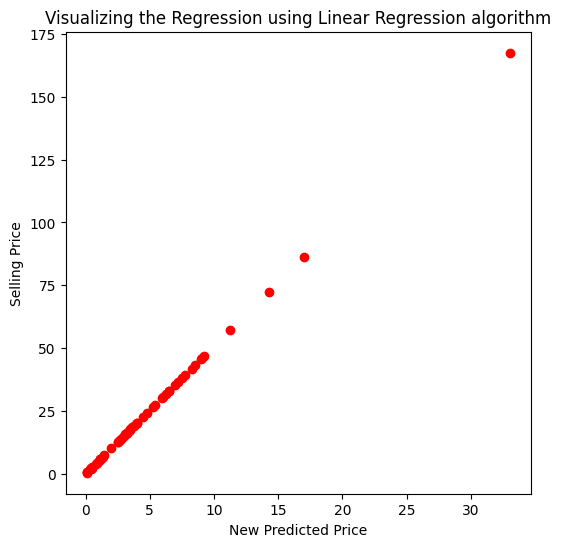

In [ ]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)

train_accuracy_lr = lr.score(X_train, Y_train)
test_accuracy_lr = lr.score(X_test, Y_test)
r2_score_lr = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",lr.coef_)
print("--------------------------------------------")
print("Intercept  :",lr.intercept_)
print("--------------------------------------------")
print('train_accuracy_lr:', train_accuracy_lr)
print("--------------------------------------------")
print('test_accuracy_lr:', test_accuracy_lr)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_lr)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Linear Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()



c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


[  8.9604863   25.16206483  11.84647063  12.23409667  22.46296198
  23.84260504  36.85812167  27.32709406   9.21031542  23.95291147
   9.53916194  38.38746129  43.09186031  24.09686703  12.96761583
  40.33243849  26.09031556   8.16386055  53.27593     11.95854485
   9.76565049  66.2854492   27.99951135   8.31888588  39.68638448
  52.19427141   8.04362443  27.54475332   9.42127326  11.17639135
  44.66869559  92.273504    30.57681415  45.09819329  47.20378093
  25.58625778  26.46665201  78.5655904   16.97528453  50.69529881
  52.52458954  35.13417634  34.63536297  28.01633827  22.34290114
   7.92762734  10.18151203  24.13283697   8.50362566  20.12809298
 173.31668686  11.75945569  25.97203791  39.49188039  31.99693544
  20.65622156  51.66853029  12.61539917  23.65369956  21.25533097
  10.96100408]
--------------------------------------------
Coeff are : [4.18357346e-03 5.05897809e+00 1.38883903e-02 5.36160856e-05
 9.90380081e-05]
--------------------------------------------
Intercept  : 

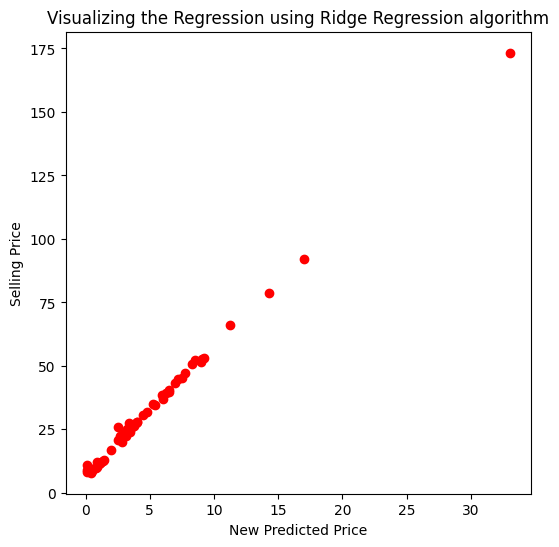

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
rd=Ridge(0.1)
rd.fit(X_train,Y_train)
Y_pred=rd.predict(X_test)
print(Y_pred)

train_accuracy_rd = rd.score(X_train, Y_train)
test_accuracy_rd = rd.score(X_test, Y_test)
r2_score_rd = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",rd.coef_)
print("--------------------------------------------")
print("Intercept  :",rd.intercept_)
print("--------------------------------------------")
print('train_accuracy_rd:', train_accuracy_rd)
print("--------------------------------------------")
print('test_accuracy_rd:', test_accuracy_rd)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_rd)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Ridge Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[  0.68935426  16.25909698   5.81294372   4.56935405  13.27448176
  17.50268665  29.93858339  16.75653285   2.48012339  16.25909698
   1.98268752  29.68986546  34.66422415  15.51294317   7.30525133
  32.42576274  12.52832796   0.83858502  46.10524915   6.06166165
   4.07191818  56.05396654  19.989866     2.0821747   32.42576274
  42.62319806   2.33089263  19.74114807   2.62935415   5.31550785
  35.90781382  84.65652903  22.47704535  37.40012143  38.64371111
  17.25396872  18.74627633  70.97704262  10.04114861  41.13089045
  45.35909534  26.20781437  26.95396817  19.989866    15.76166111
   2.0821747    4.56935405  16.25909698   2.57961057  14.2693535
 164.24626815   5.81294372  18.24884046  31.18217306  23.72063502
  12.52832796  44.81191589   6.80781546  15.01550731  13.27448176
   0.58986709]
--------------------------------------------
Coeff are : [ 0.          4.97435869  0.          0.         -0.        ]
--------------------------------------------
Intercept  : 0.092431220349916

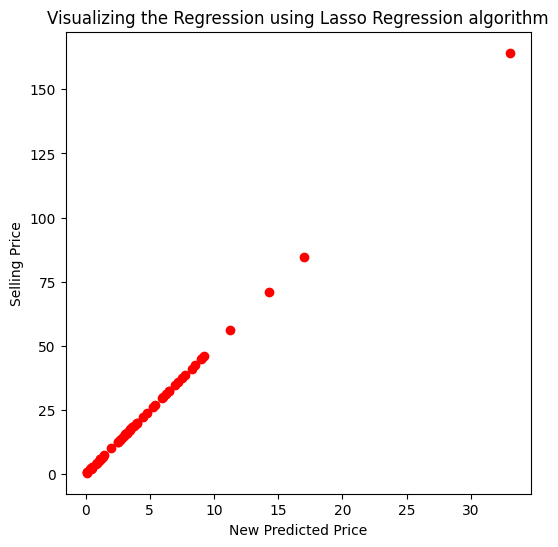

In [ ]:
#Lasso 
from sklearn.linear_model import Lasso
ls=Lasso(0.1)
ls.fit(X_train,Y_train)
Y_pred=ls.predict(X_test)
print(Y_pred)

train_accuracy_ls = ls.score(X_train, Y_train)
test_accuracy_ls= ls.score(X_test, Y_test)
r2_score_ls = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",ls.coef_)
print("--------------------------------------------")
print("Intercept  :",ls.intercept_)
print("--------------------------------------------")
print('train_accuracy_ls:', train_accuracy_ls)
print("--------------------------------------------")
print('test_accuracy_ls:', test_accuracy_ls)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_ls)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Lasso Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


[ 2.39415922e+15  2.64671759e+15  1.42563193e+14  1.73343177e+15
  2.97858806e+15  1.98471578e+14  5.22678085e+14  4.16752390e+15
  8.69141775e+14  1.50360670e+15  1.66152420e+15  2.18916587e+15
  1.73161846e+15  2.34878580e+15 -2.38565206e+14  1.39795039e+15
  6.91251006e+15  1.47889055e+15  4.61337118e+14  5.40659423e+12
 -1.47044257e+14  3.15323557e+15  1.73323939e+15  4.12026415e+14
  7.76504915e+14  2.75104416e+15 -9.62021940e+13  1.52886558e+15
  9.19779236e+14 -9.79572785e+12  2.13807968e+15  1.40150881e+14
  1.75908649e+15  1.10172417e+15  1.88372871e+15  2.08796282e+15
  1.47853840e+15  3.08101763e+14  9.05305278e+14  2.81750418e+15
  4.68463146e+14  2.45547220e+15  1.29644397e+15  1.73334450e+15
  4.62241942e+14  4.12385856e+13 -2.33405191e+14  1.63114121e+15
  1.07394595e+14 -1.91293051e+14  7.13642478e+11  5.64767699e+13
  1.47824337e+15  1.73808667e+15  1.88452385e+15  2.00064806e+15
  1.57117381e+14 -9.12509429e+13  2.42722583e+15  1.80610579e+15
  4.38705682e+15]
-------

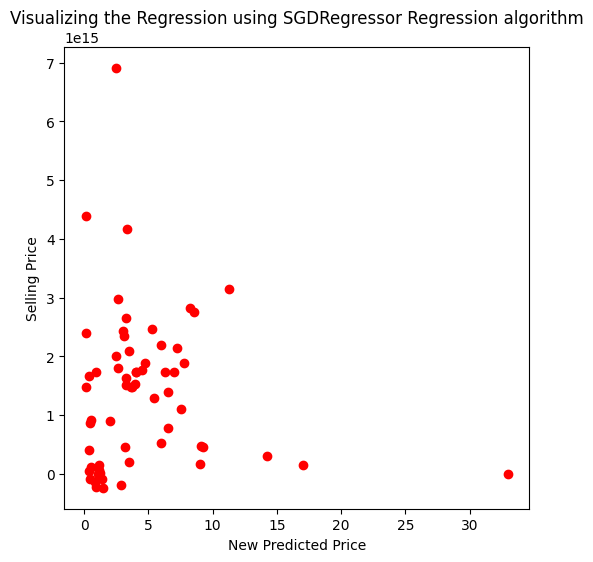

In [ ]:
#SGD Regressor 
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss="squared_error")
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
print(Y_pred)

train_accuracy_sgd = sgd.score(X_train, Y_train)
test_accuracy_sgd= sgd.score(X_test, Y_test)
r2_score_sgd= r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",sgd.coef_)
print("--------------------------------------------")
print("Intercept  :",sgd.intercept_)
print("--------------------------------------------")
print('train_accuracy_sgd:', train_accuracy_sgd)
print("--------------------------------------------")
print('test_accuracy_sgd:', test_accuracy_sgd)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_sgd)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using SGDRegressor Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


[ 0.735 15.98   5.82   4.58  14.77  18.65  24.6   20.04   2.32  15.98
  1.905 28.1   28.1   15.98   7.53  28.1   16.395  0.863 28.1    6.145
  4.03  28.1   19.949  2.065 28.1   28.1    2.29  19.324  2.6    5.355
 28.1   28.1   26.85  28.1   28.1   18.65  18.9   28.1   11.096 28.1
 28.1   26.9   23.4   19.949 15.98   2.065  4.585 19.655  2.6   15.255
 28.1    5.82  18.725 28.1   26.9   14.345 28.1    6.725 15.72  16.395
  0.649]
--------------------------------------------
train_accuracy_rf: 0.9977639103041621
--------------------------------------------
test_accuracy_rf: -6.886993346743921
--------------------------------------------
 Acuracy of Our Model is : -6.886993346743921
--------------------------------------------


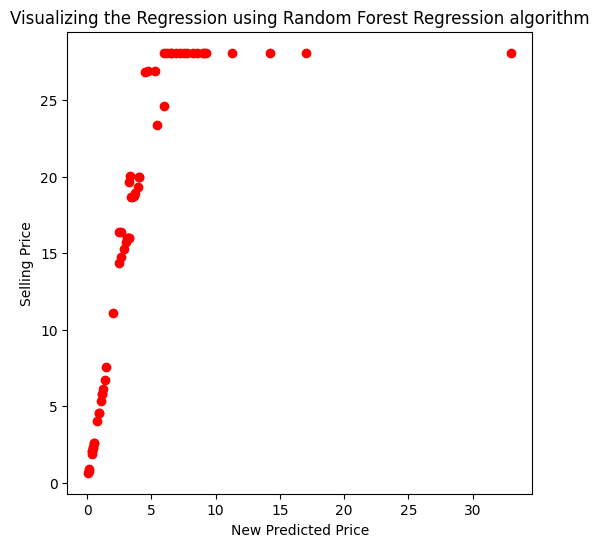

In [ ]:
#Random froest Regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print(Y_pred)

train_accuracy_rf = rf.score(X_train, Y_train)
test_accuracy_rf= rf.score(X_test, Y_test)
r2_score_rf= r2_score(Y_test, Y_pred)
#Random forest does not have coeff anf intercepts
#print("Coeff are :",rf.coef_)
#print("Intercept  :",rf.intercept_)
print("--------------------------------------------")
print('train_accuracy_rf:', train_accuracy_rf)
print("--------------------------------------------")
print('test_accuracy_rf:', test_accuracy_rf)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_rf)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


[ 1.03065789 15.643125    5.95        4.69309524 11.87       18.88170213
 23.23529412 15.88833333  2.71190476 15.643125    1.44521739 23.23529412
 23.23529412 15.26571429  7.26818182 23.23529412 11.87        1.03065789
 23.23529412  5.95        4.69309524 23.23529412 19.95        2.55810811
 23.23529412 23.23529412  2.55810811 19.95        2.71190476  4.98716981
 23.23529412 23.23529412 23.1        23.23529412 23.23529412 18.88170213
 19.1322449  23.23529412 10.34514286 23.23529412 23.23529412 23.1
 22.55       19.95       15.26571429  2.55810811  4.69309524 15.643125
  2.71190476 15.26571429 23.23529412  5.95       19.1322449  23.23529412
 23.1        11.87       23.23529412  6.75258621 15.26571429 11.87
  1.03065789]
--------------------------------------------
train_accuracy_ada: 0.9939077302435045
--------------------------------------------
test_accuracy_ada: -4.554196134350616
--------------------------------------------
 Acuracy of Our Model is : -4.554196134350616
-------------

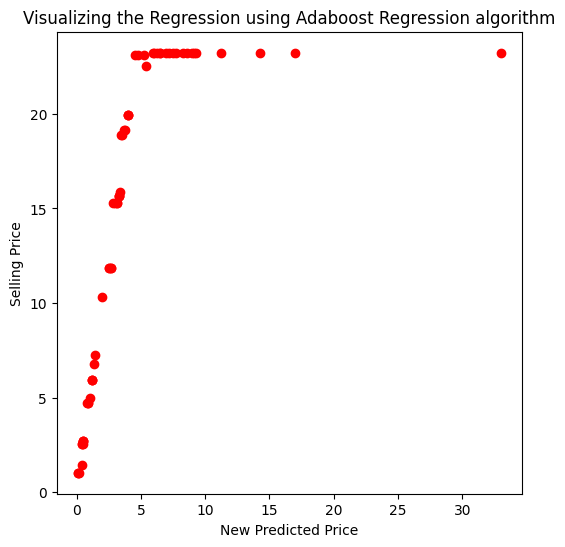

In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=10)
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
print(Y_pred)

train_accuracy_ada = ada.score(X_train, Y_train)
test_accuracy_ada= ada.score(X_test, Y_test)
r2_score_ada= r2_score(Y_test, Y_pred)
#Adaboost does not have coeff and intedcept
#print("Coeff are :",ada.coef_)
#print("Intercept  :",ada.intercept_)
print("--------------------------------------------")
print('train_accuracy_ada:', train_accuracy_ada)
print("--------------------------------------------")
print('test_accuracy_ada:', test_accuracy_ada)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_ada)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Adaboost Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()


[ 0.5926393 15.704658   5.7721734  4.3902955 12.386805  17.603065
 23.612572  15.704658   2.2329526 15.704658   1.9074174 23.612572
 23.612572  15.704658   7.1507072 23.612572  11.870303   0.7374354
 23.612572   5.898641   3.9706535 23.612572  19.174982   1.9282205
 23.612572  23.612572   2.2329526 19.174982   2.459461   5.2547894
 23.612572  23.612572  21.307446  23.612572  23.612572  17.603065
 17.603065  23.612572   9.917005  23.612572  23.612572  21.307446
 21.307446  19.174982  15.704658   1.9282205  4.3902955 15.704658
  2.459461  12.898508  23.612572   5.7721734 17.603065  23.612572
 21.307446  11.870303  23.612572   6.639608  12.898508  12.386805
  0.4952564]
--------------------------------------------
train_accuracy_xgb: 0.9893727943194925
--------------------------------------------
test_accuracy_xgb: -4.312792623122192
--------------------------------------------
 Acuracy of Our Model is : -4.312792623122192
--------------------------------------------


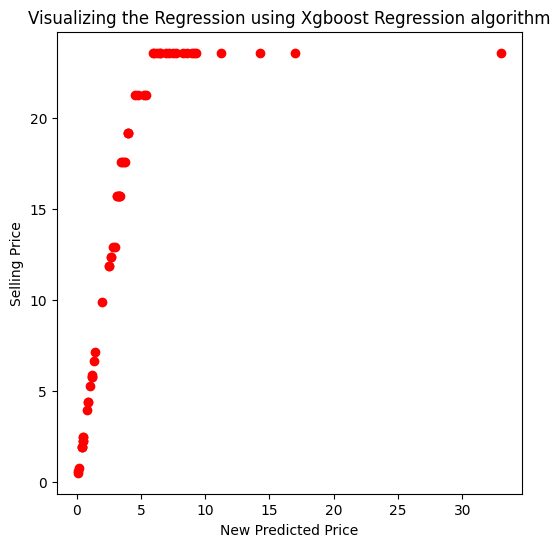

In [ ]:
#Xgboost
import xgboost as xg
xgb=xg.XGBRegressor(n_estimators=10)
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
print(Y_pred)

train_accuracy_xgb = xgb.score(X_train, Y_train)
test_accuracy_xgb= xgb.score(X_test, Y_test)
r2_score_xgb= r2_score(Y_test, Y_pred)
#Xgboost regressor does not have coef and intercepts 
#print("Coeff are :",xgb.coef_)
#print("Intercept  :",xgb.intercept_)
print("--------------------------------------------")
print('train_accuracy_xgb:', train_accuracy_xgb)
print("--------------------------------------------")
print('test_accuracy_xgb:', test_accuracy_xgb)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_xgb)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Xgboost Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


[5.957 5.797 6.047 5.957 5.797 6.047 6.047 5.797 5.957 5.957 5.957 5.957
 5.957 5.957 6.793 5.957 5.797 5.957 6.047 6.047 8.052 5.797 5.957 6.047
 5.957 5.797 8.052 5.957 5.957 6.047 5.957 6.047 5.957 5.957 5.957 5.957
 5.957 6.047 5.957 5.797 6.047 5.957 5.957 5.957 6.047 6.047 6.793 5.957
 6.047 8.297 7.487 6.047 5.957 5.957 5.957 5.957 6.047 8.052 5.957 5.957
 5.797]
--------------------------------------------
train_accuracy_kn: 0.9429575979194018
--------------------------------------------
test_accuracy_kn: -0.09902257334749454
--------------------------------------------
 Acuracy of Our Model is : -0.09902257334749454
--------------------------------------------


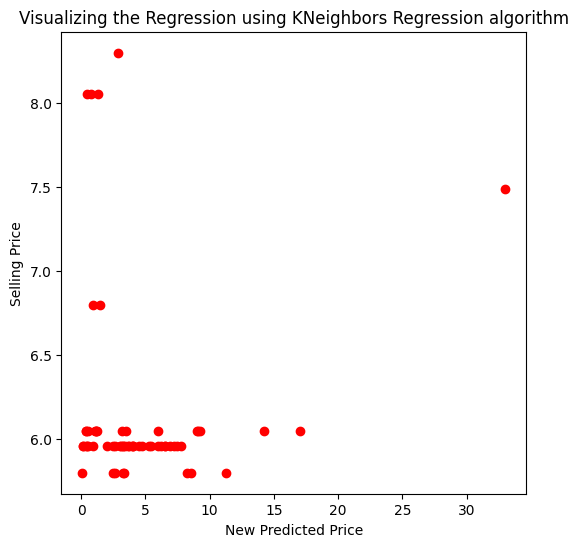

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train,Y_train)
Y_pred=kn.predict(X_test)
print(Y_pred)

train_accuracy_kn = kn.score(X_train, Y_train)
test_accuracy_kn= kn.score(X_test, Y_test)
r2_score_kn= r2_score(Y_test, Y_pred)
#KNeighbors does not hav an coefficeints and intercepts
#print("Coeff are :",kn.coef_)
#print("Intercept  :",kn.intercept_)
print("--------------------------------------------")
print('train_accuracy_kn:', train_accuracy_kn)
print("--------------------------------------------")
print('test_accuracy_kn:', test_accuracy_kn)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_kn)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using KNeighbors Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()